# Importing Libraries

In [4]:
import warnings 
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from pandas.plotting import lag_plot
from datetime import datetime
import time
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.pipeline import make_pipeline
import numpy as np
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout, SimpleRNN, GRU, Bidirectional
from pickle import load
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

In [5]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Importing Dataset

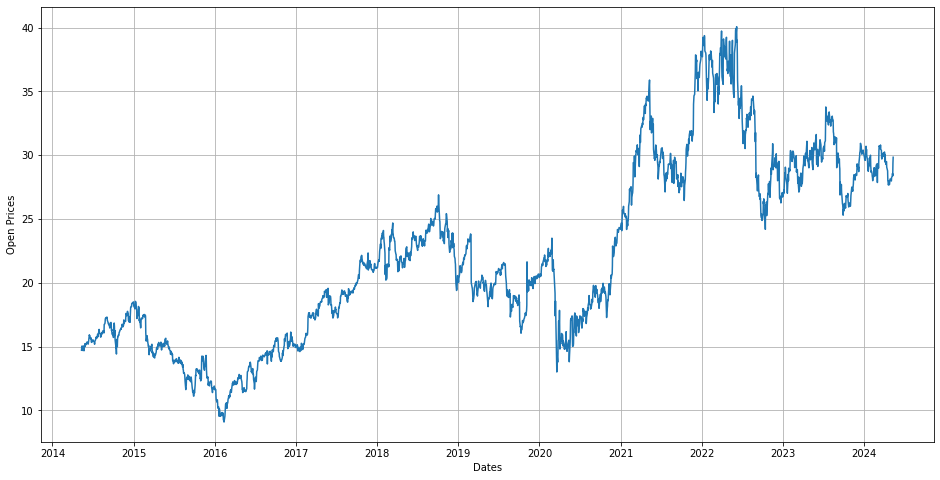

In [53]:
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m-%d')
data = pd.read_csv('HPQ.csv', sep=',', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open']);

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-05-12 to 2024-05-10
Data columns (total 6 columns):
Open         2518 non-null float64
High         2518 non-null float64
Low          2518 non-null float64
Close        2518 non-null float64
Adj Close    2518 non-null float64
Volume       2518 non-null int64
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [55]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-12,14.713896,14.936421,14.704814,14.904632,11.009472,13174786
2014-05-13,14.950045,15.140781,14.900091,15.113533,11.163778,16176332
2014-05-14,15.045413,15.140781,14.940963,14.972752,11.059792,14955984
2014-05-15,14.972752,15.027248,14.691190,14.718438,10.871939,15890072
2014-05-16,14.700272,14.768392,14.618529,14.768392,10.908838,17682280


In [56]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,28.330000,28.440001,28.219999,28.420000,28.420000,4354600
2024-05-07,28.570000,28.799999,28.250000,28.410000,28.410000,3953100
2024-05-08,28.379999,29.580000,28.379999,29.440001,29.440001,8796700
2024-05-09,29.389999,29.680000,29.330000,29.650000,29.650000,6431700
2024-05-10,29.840000,29.879999,29.620001,29.719999,29.719999,4972100


In [57]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,22.114604,22.392192,21.867076,22.128066,19.411409,1.314625e+07
std,7.095105,7.194606,7.008720,7.098195,7.646373,9.820363e+06
min,9.090000,9.200000,8.910000,9.020000,6.932183,2.309800e+06
25%,16.080000,16.245743,15.913943,16.092439,12.663564,7.513125e+06
50%,20.835000,21.090000,20.605000,20.790001,17.553230,1.024710e+07
75%,28.280001,28.590000,27.925000,28.277501,26.765997,1.524490e+07
max,40.070000,41.470001,39.279999,40.340000,37.641613,1.386989e+08


In [58]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Visulization

No handles with labels found to put in legend.


          t-1       t+1
t-1  1.000000  0.809964
t+1  0.809964  1.000000


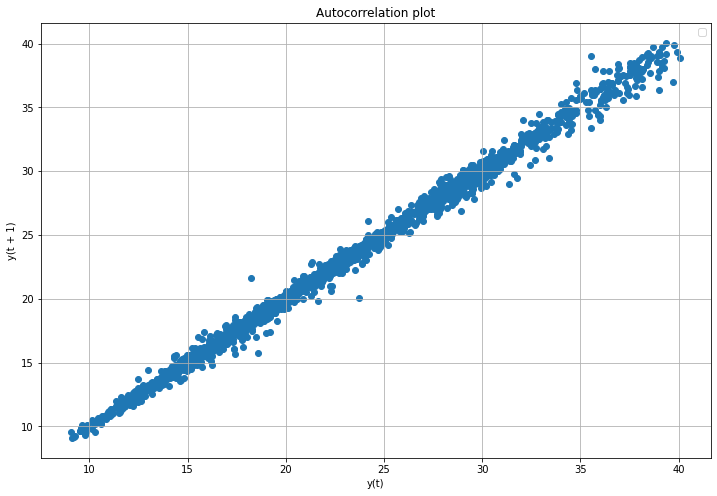

In [59]:

plt.figure(figsize=(12,8))
lag_plot(data['Open'], lag=1)
plt.title('Autocorrelation plot')
plt.grid(True)
plt.legend();


values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(120), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

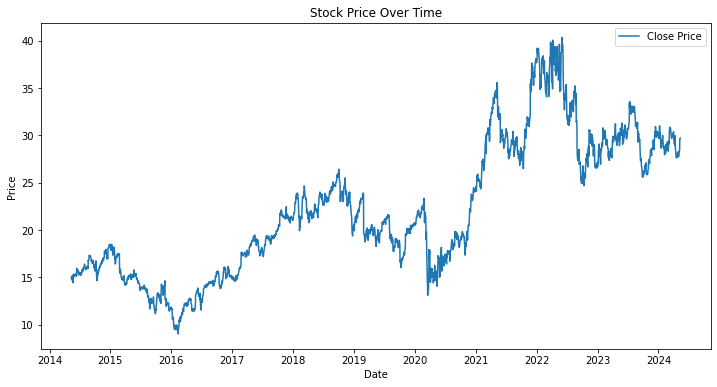

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

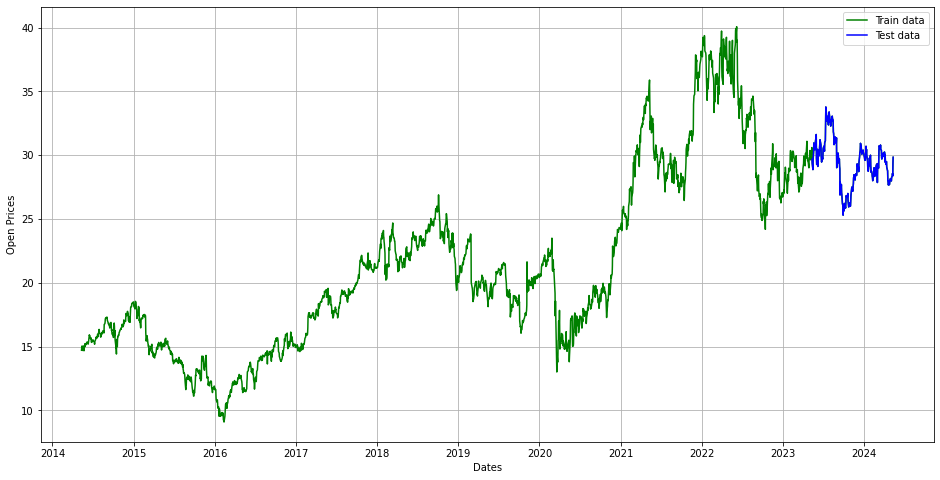

In [61]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

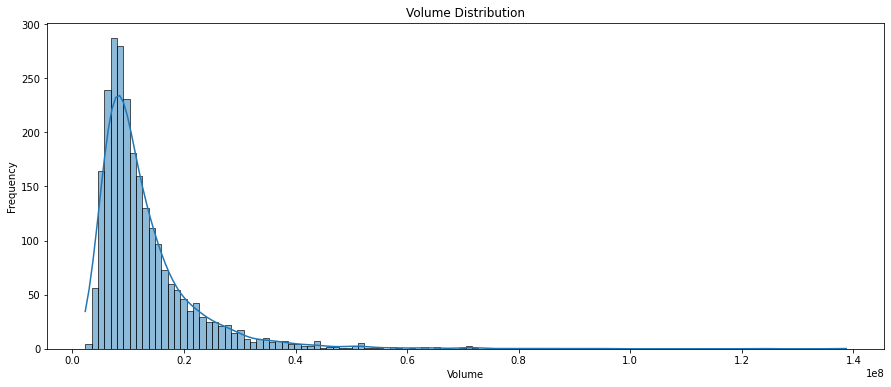

In [62]:
sns.histplot(data['Volume'], kde=True)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Volume Distribution')
plt.show()

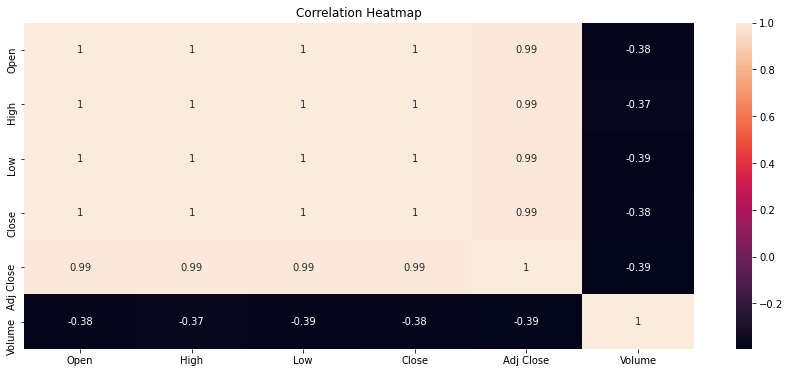

In [63]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

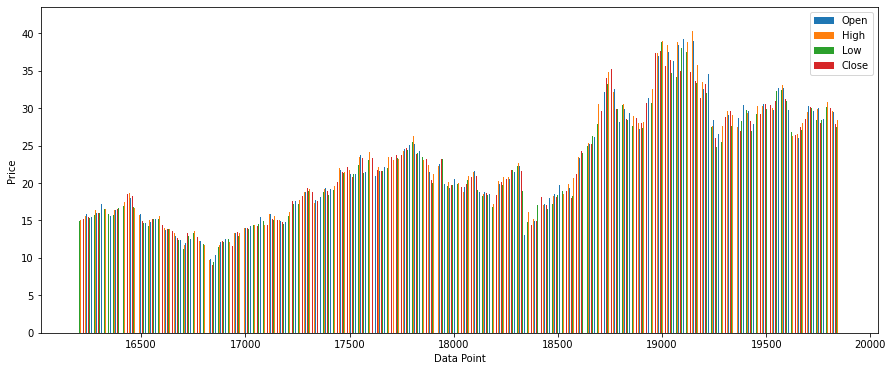

In [100]:
df = data
x = mdates.date2num(df.index)

width = 0.2  # Adjust the width as needed

plt.bar(x - width, df['Open'], width=width, label='Open')
plt.bar(x, df['High'], width=width, label='High')
plt.bar(x + width, df['Low'], width=width, label='Low')
plt.bar(x + 2 * width, df['Close'], width=width, label='Close')

plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Price Distribution')

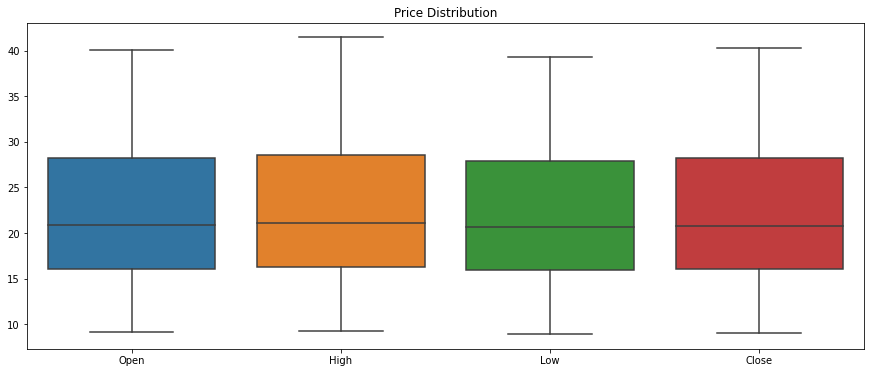

In [65]:
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Price Distribution')

# Model Building 

In [66]:
train = train_data.iloc[:, 0:1].values 
scaler = MinMaxScaler() 
train_scaled = scaler.fit_transform(train)
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) 
    y_train.append(train_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)

In [67]:
test = test_data.iloc[:, 0:1].values 
scaler = MinMaxScaler() 
test_scaled = scaler.fit_transform(test)
timesteps = 7
X_test = []
y_test = []
for i in range(timesteps, test.shape[0]):
    X_test.append(test_scaled[i-timesteps:i, 0]) 
    y_test.append(test_scaled[i, 0]) 
X_test, y_test = np.array(X_test), np.array(y_test)

# Machine Learning

# AdaBoost

In [68]:
ada = AdaBoostRegressor(random_state=0, n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

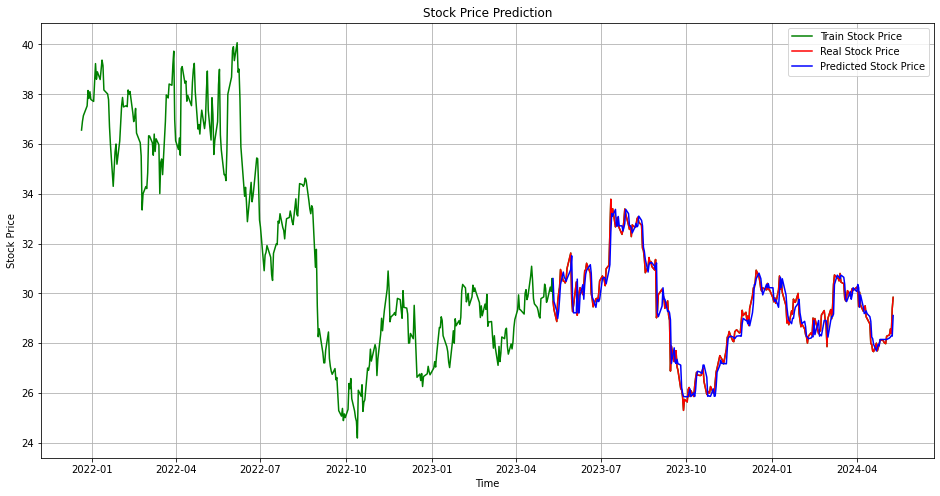

In [69]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = ada.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
mse5 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse5))
mae5 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae5))
rmse5 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse5))
r25 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r25))

MSE: 0.22768566679372645
MAE: 0.3555037993266598
RMSE: 0.4771641926986207
R2 Score: 0.93146896279398


# Linear Regression

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

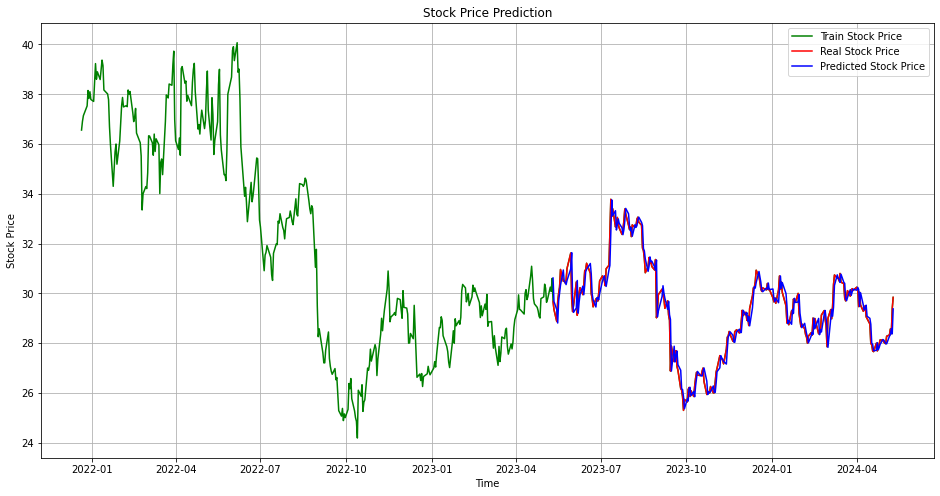

In [72]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = lr.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
mse7 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse7))
mae7 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae7))
rmse7 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse7))
r27 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r27))

MSE: 0.214845019247243
MAE: 0.3379078607723197
RMSE: 0.4635137746035634
R2 Score: 0.9353338652586338


# Deep Learning

# RNN 

In [74]:
train = train_data.iloc[:, 0:1].values 

In [75]:
scaler = MinMaxScaler() 
train_scaled = scaler.fit_transform(train)

In [76]:
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) 
    y_train.append(train_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)

In [77]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #Reshaping
from numpy.random import seed 
seed(2019)

In [78]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Use SimpleRNN

model.add(Dropout(0.20))

model.add(SimpleRNN(units=50, return_sequences=True))  # Use SimpleRNN
model.add(Dropout(0.25))

model.add(SimpleRNN(units=50, return_sequences=True))  # Use SimpleRNN
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))  # Use SimpleRNN
model.add(Dropout(0.25))

model.add(Dense(units=1))

In [79]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
71/71 [==============================] - 2s 4ms/step - loss: 0.2390
Epoch 2/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0830
Epoch 3/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 4/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0278
Epoch 5/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 6/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 7/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 8/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 9/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 10/40
71/71 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 11/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 12/40
71/71 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 13/40
71/71 [==============================

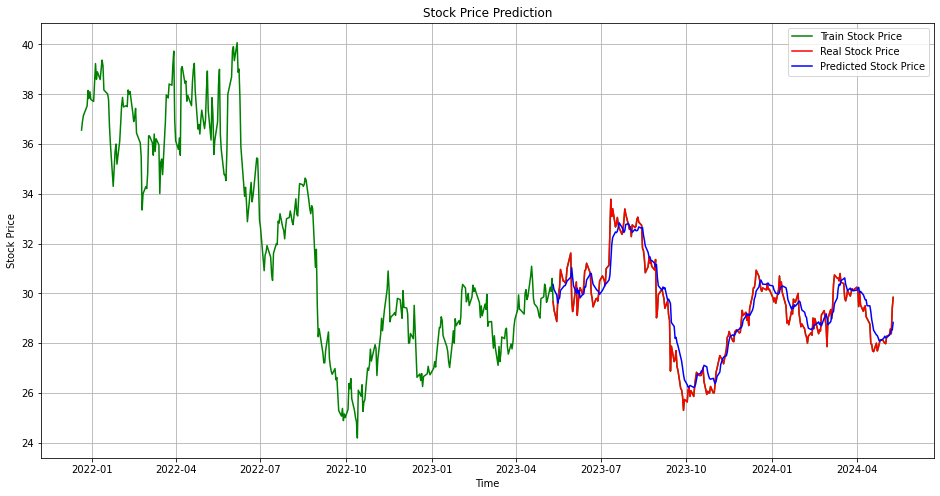

In [80]:
real_stock_price = test_data.iloc[:,0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
mse11 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse11))
mae11 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae11))
rmse11 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse11))
r211 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r211))

MSE: 0.3937732439267092
MAE: 0.4724299642774793
RMSE: 0.6275135408313587
R2 Score: 0.8814783152128569


## LSTM

In [82]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.20))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))


model.add(Dense(units = 1))

In [83]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 7, 50)             10400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 50)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 50)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 7, 50)             20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 50)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [84]:
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
71/71 [==============================] - 4s 9ms/step - loss: 0.0330
Epoch 2/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 3/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 4/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0038
Epoch 5/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 6/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0033
Epoch 7/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0029
Epoch 8/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 9/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch 10/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch 11/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 12/40
71/71 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 13/40
71/71 [==============================

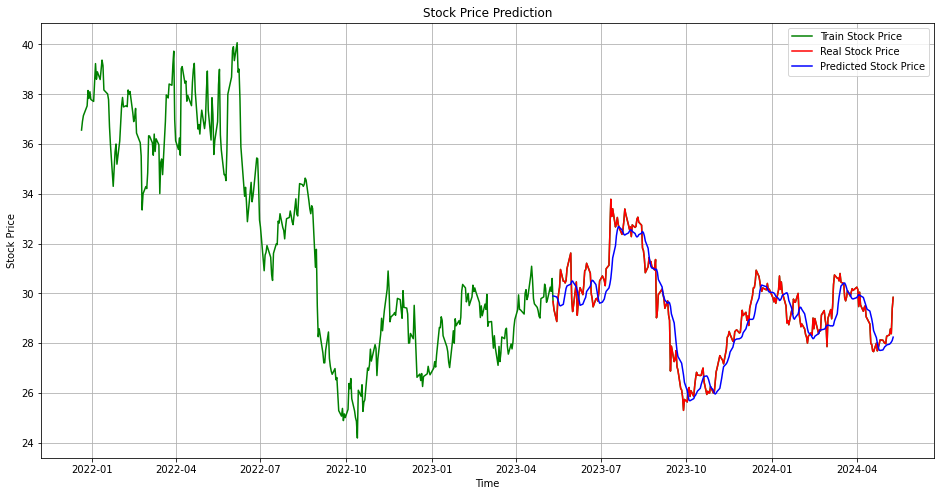

In [85]:
real_stock_price = test_data.iloc[:,0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
mse12 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse12))
mae12 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae12))
rmse12 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse12))
r212 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r212))

MSE: 0.5748214211838755
MAE: 0.5914259638105118
RMSE: 0.758169783876854
R2 Score: 0.8269846813077698


# BiLSTM

In [87]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.20))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.25))
model.add(Dense(units=1))

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 7, 100)            20800     
_________________________________________________________________
dropout_20 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 7, 100)            60400     
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 7, 100)            60400     
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100)              

In [89]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
71/71 [==============================] - 8s 12ms/step - loss: 0.0168
Epoch 2/40
71/71 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 3/40
71/71 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 4/40
71/71 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 5/40
71/71 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 6/40
71/71 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 7/40
71/71 [==============================] - 1s 14ms/step - loss: 0.0019
Epoch 8/40
71/71 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 9/40
71/71 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 10/40
71/71 [==============================] - 1s 14ms/step - loss: 0.0018
Epoch 11/40
71/71 [==============================] - 1s 15ms/step - loss: 0.0015
Epoch 12/40
71/71 [==============================] - 1s 15ms/step - loss: 0.0017
Epoch 13/40
71/71 [==================

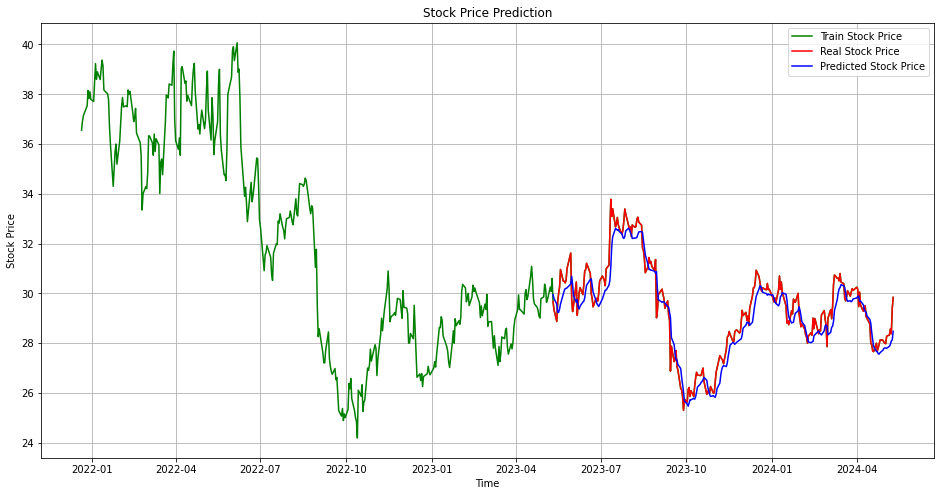

In [90]:
real_stock_price = test_data.iloc[:,0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
mse14 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse14))
mae14 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae14))
rmse14 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse14))
r214 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r214))

MSE: 0.3859654075029048
MAE: 0.48880373485504625
RMSE: 0.6212611427595522
R2 Score: 0.8838283934412903


# Comparison

In [92]:


results = {
    'R-squared': [ r25, r27, r211,r212,r214],
    'Mean Squared Error': [ mse5,  mse7, mse11, mse12,  mse14],
    'Mean Absolute Error': [ mae5,mae7,  mae11, mae12, mae14],
    'Root Mean Squared Error': [ rmse5,  rmse7,  rmse11, rmse12, rmse14]
}


index = ['Adaboost','Linear Regression','RNN','LSTM','BiLSTM']

In [93]:
results =pd.DataFrame(results,index=index)

In [94]:
print(results)

                   R-squared  Mean Squared Error  Mean Absolute Error  \
Adaboost            0.931469            0.227686             0.355504   
Linear Regression   0.935334            0.214845             0.337908   
RNN                 0.881478            0.393773             0.472430   
LSTM                0.826985            0.574821             0.591426   
BiLSTM              0.883828            0.385965             0.488804   

                   Root Mean Squared Error  
Adaboost                          0.477164  
Linear Regression                 0.463514  
RNN                               0.627514  
LSTM                              0.758170  
BiLSTM                            0.621261  


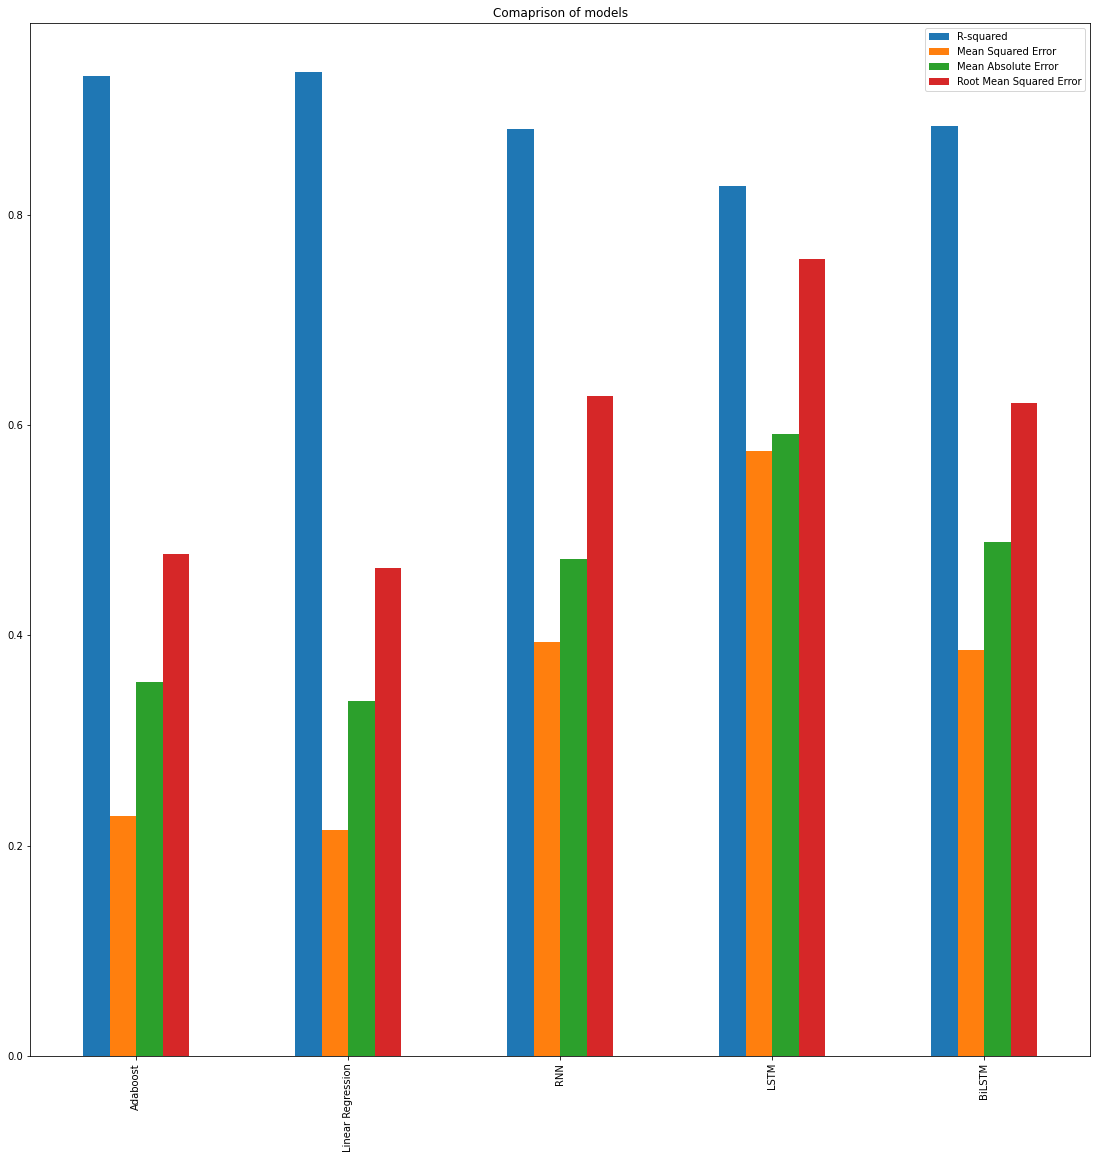

In [95]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(10,10)).get_figure()
fig.savefig('Final Result.png')

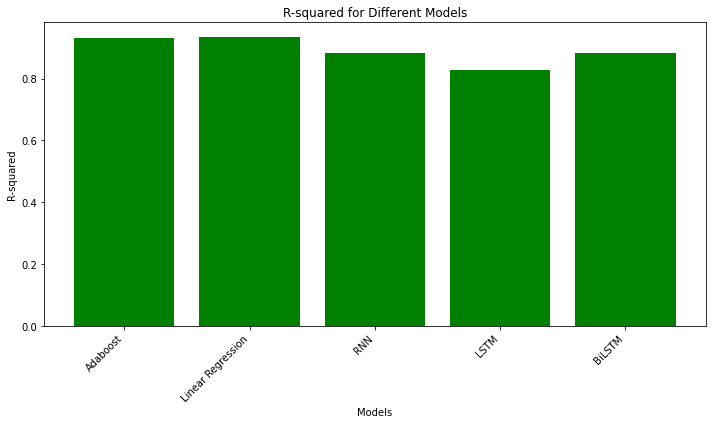

In [96]:
def visualize_metric(metric, color):
    plt.figure(figsize=(10, 6))
    plt.bar(index, results[metric], color=color)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


visualize_metric('R-squared', 'green')

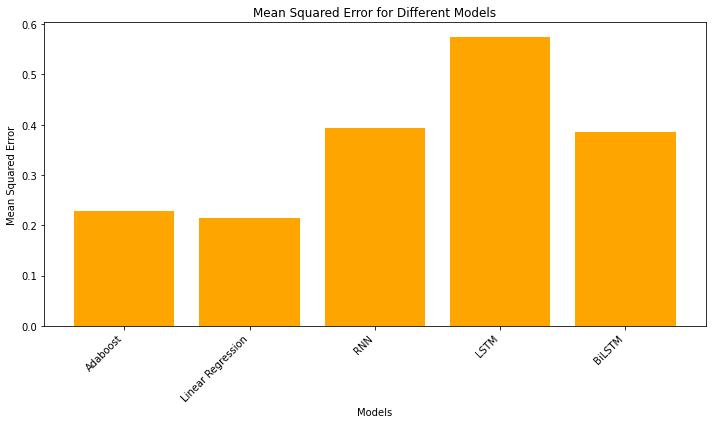

In [97]:



def visualize_metric(metric, color):
    plt.figure(figsize=(10, 6))
    plt.bar(index, results[metric], color=color)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


visualize_metric('Mean Squared Error', 'orange')


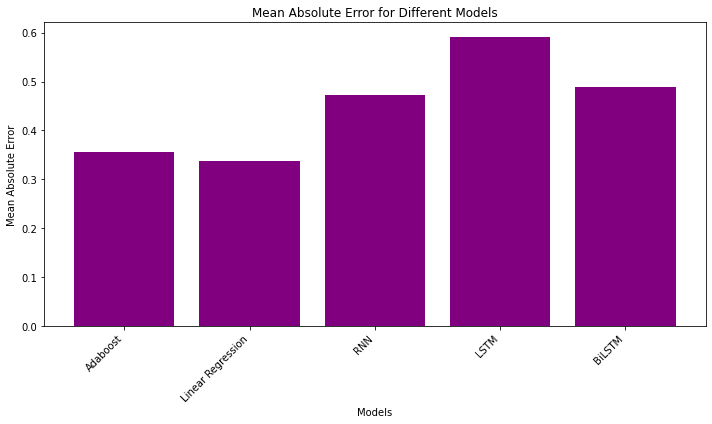

In [98]:
visualize_metric('Mean Absolute Error', 'purple')

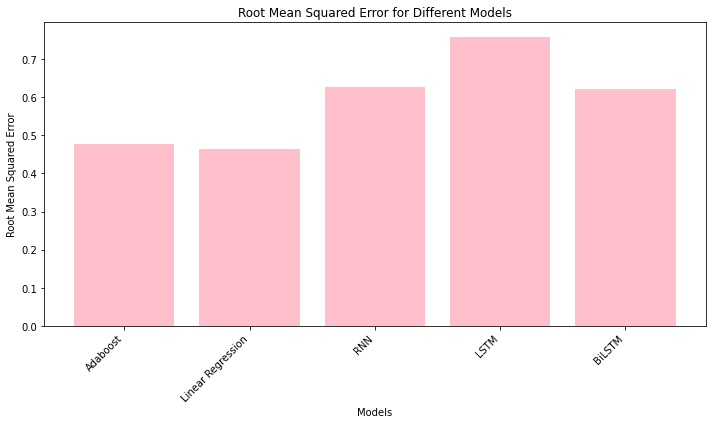

In [99]:
visualize_metric('Root Mean Squared Error', 'pink')